## Automated Feature Engineering Tools

In [1]:
# So far we have considered feature Engineering and some of the techniques used in feature engineering such as dealing with outliers, missing values, date and time, feature transformation, feature scaling, categorical encoding.
# In this tutorial, we will learn how to use Automated Featuring Tools to perform feature engineering.

In [2]:
# FeatureSelector
# RFECV
# Featuretools
# AutoFeat

## FeatureSelector

In [3]:
# Feature selection involves the process of finding and selecting the most useful features in the dataset.
# Unnecessary features hurt our model and we must try as much as possible to get rid of them.
# Feature Selection is actually one of the tedious work to do for any data analyst or scientist.
# likely, Feature Selector does most of the dirty work for us so we dont have to do it.


# Feature Selector contains most of the common feature selection methods such as 

    # Features with high percentage of missing values
    # Features with a single unique value
    # Collinear (highly correalated) features
    # Featues with low importance
    # Features with zero importance in a tree based model

In [4]:
#!pip install feature_selector
#https://stackoverflow.com/questions/60592800/how-do-you-resolve-egg-info-error-when-installing-feature-selector-in-jupyter-no

In [5]:
from feature_selector import FeatureSelector
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('credit_example.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,0,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,0,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,0,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,0,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,0,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [7]:
train_labels = df['TARGET']
df.drop('TARGET',axis=1,inplace=True)

In [8]:
fs = FeatureSelector(df,labels=train_labels)

In [9]:
fs.identify_missing(0.50)

44 features with greater than 0.50 missing values.



In [10]:
df.shape

(10000, 121)

In [11]:
MissingFeatures = fs.ops['missing']
len(MissingFeatures)

44

In [12]:
fs.missing_stats.head()

,missing_fraction
COMMONAREA_AVG,0.6953
COMMONAREA_MODE,0.6953
COMMONAREA_MEDI,0.6953
NONLIVINGAPARTMENTS_AVG,0.6945
NONLIVINGAPARTMENTS_MODE,0.6945


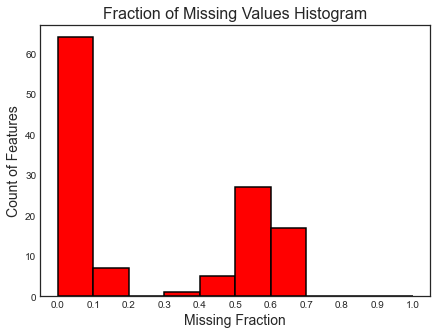

In [13]:
fs.plot_missing()

In [14]:
fs.identify_collinear(0.9)

c:\users\karthikraghavan\feature-selector\feature_selector\feature_selector.py:192: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr()


35 features with a correlation magnitude greater than 0.90.



c:\users\karthikraghavan\feature-selector\feature_selector\feature_selector.py:222: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


In [15]:
CollinearFeatures = fs.ops['collinear']
CollinearFeatures

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

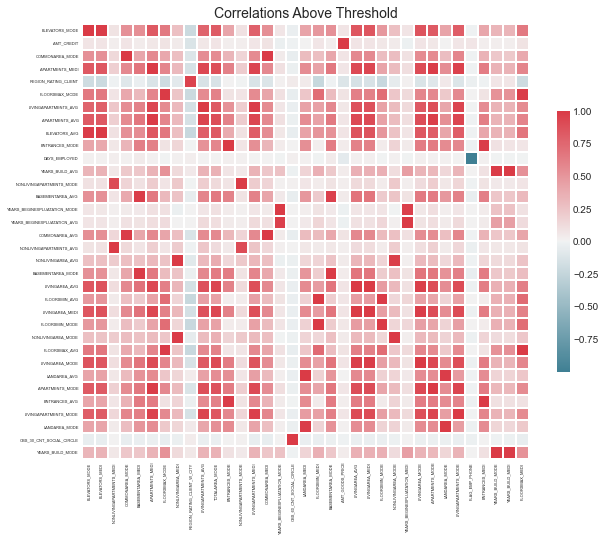

In [16]:
# plotting Collinear Features

fs.plot_collinear()

In [17]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,AMT_GOODS_PRICE,AMT_CREDIT,0.987232
1,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999533
2,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.952982
3,LIVINGAPARTMENTS_AVG,APARTMENTS_AVG,0.947899
4,LIVINGAREA_AVG,APARTMENTS_AVG,0.916539
...,...,...,...
59,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,0.978754
60,TOTALAREA_MODE,LIVINGAREA_AVG,0.930656
61,TOTALAREA_MODE,LIVINGAREA_MODE,0.908783
62,TOTALAREA_MODE,LIVINGAREA_MEDI,0.923316


In [18]:
## Zero Importance Features

fs.identify_zero_importance('classification','auc',)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.755182	valid_0's binary_logloss: 0.250536
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.746562	valid_0's binary_logloss: 0.250733
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	valid_0's auc: 0.733428	valid_0's binary_logloss: 0.261813
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.740369	valid_0's binary_logloss: 0.256783
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.744992	valid_0's binary_logloss: 0.251829
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.723459	valid_0's binary_logloss: 0.260673

In [19]:
fs.data_all

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
9996,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
9997,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9998,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,9.0


In [20]:
# Feature importance

fs.ops['zero_importance']

['ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Services',
 'FLAG_DOCUMENT_4',
 'ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Security',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Religion',
 'ORGANIZATION_TYPE_Realtor',
 'ORGANIZATION_TYPE_Postal',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_2',
 'ORGANIZATION_TYPE_Trade: type 5',
 'HOUSETYPE_MODE_specific housing',
 'EMERGENCYSTATE_MODE_No',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'WALLSMATERIAL_MODE_Others',
 'WALLSMATERIAL_MODE_Monolithic',
 'HOUSETYPE_MODE_terraced house',
 'FLAG_CONT_MOBILE',
 'ORGANIZATION_TYPE_Trade: type 6',
 'FONDKAPREMONT_MODE_not specified',
 'ORGANIZATION_TYPE_XNA',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 2',
 'ORGANIZATION_TYPE_Transport: type 1',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATIO

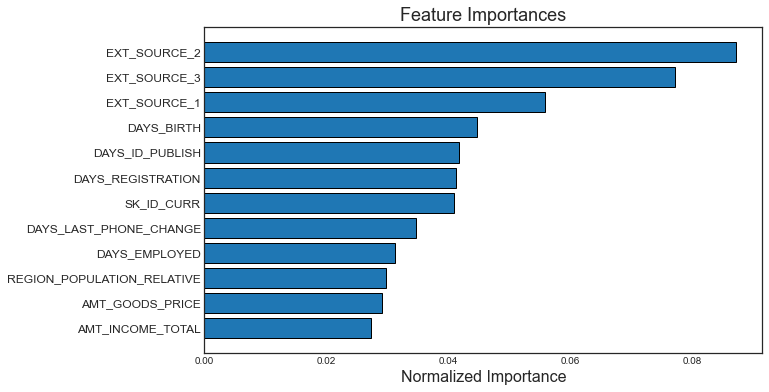

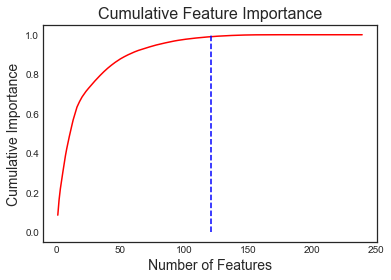

121 features required for 0.99 of cumulative importance


In [21]:
fs.plot_feature_importances(threshold=0.99,plot_n = 12)

In [22]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_2,158.3,0.087218,0.087218
1,EXT_SOURCE_3,140.3,0.077300,0.164518
2,EXT_SOURCE_1,101.4,0.055868,0.220386
3,DAYS_BIRTH,81.1,0.044683,0.265069
4,DAYS_ID_PUBLISH,75.9,0.041818,0.306887
5,DAYS_REGISTRATION,74.8,0.041212,0.348099
6,SK_ID_CURR,74.3,0.040937,0.389036
7,DAYS_LAST_PHONE_CHANGE,63.1,0.034766,0.423802
8,DAYS_EMPLOYED,56.8,0.031295,0.455096
9,REGION_POPULATION_RELATIVE,54.2,0.029862,0.484959


In [23]:
## Low Importance Features

fs.identify_low_importance(0.99)

120 features required for cumulative importance of 0.99 after one hot encoding.
119 features do not contribute to cumulative importance of 0.99.



In [24]:
fs.ops['low_importance'][:10]

['ORGANIZATION_TYPE_Medicine',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'OCCUPATION_TYPE_Drivers',
 'ORGANIZATION_TYPE_Restaurant',
 'NAME_HOUSING_TYPE_Rented apartment',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary']

In [25]:
## Removing Features

fs.check_removal()

Total of 166 features identified for removal


['ELEVATORS_MODE',
 'ORGANIZATION_TYPE_Transport: type 3',
 'NONLIVINGAPARTMENTS_MEDI',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'APARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'ORGANIZATION_TYPE_Industry: type 4',
 'WEEKDAY_APPR_PROCESS_START_SUNDAY',
 'ORGANIZATION_TYPE_Security Ministries',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE_Mixed',
 'HOUSETYPE_MODE',
 'ELEVATORS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'ORGANIZATION_TYPE_Trade: type 1',
 'HOUSETYPE_MODE_specific housing',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'ORGANIZATION_TYPE_Realtor',
 'BASEMENTAREA_AVG',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'LANDAREA_MEDI',
 'OCCUPATION_TYPE_Waiters/barmen staff',
 'NONLIVINGAPARTMENTS_AVG',
 'LIVE_REGION_NOT_WORK_REGION',
 'BASEMENTAREA_MODE',
 'AMT_GOODS_PRICE',
 'ORGANIZATION_TYPE_Industry: type 11',
 'ORGANIZATION_TYPE_Industry: type 12',
 'LIVINGAREA_AVG',
 'FLOORSMIN_AVG',
 'FLAG_DOCUMENT_15',
 'NAME_TYPE_SUITE_Group of people',
 'ORGANIZATION_TYPE_Industry: type 5',
 'FLAG_OWN_CAR_N',
 '

In [26]:
fs.remove(methods='all')

['missing', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 166 features.


,NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,0,1,0,0,0,1,0,0,...,1.0,-2622.0,1,0,0,0,0.0,0.0,0.0,1.0
1,0,1,0,0,1,0,0,1,0,0,...,0.0,-520.0,0,0,0,0,0.0,0.0,0.0,0.0
2,1,1,0,0,1,1,0,0,0,0,...,0.0,-1285.0,1,0,0,0,1.0,0.0,0.0,7.0
3,1,1,0,0,1,0,0,1,0,0,...,0.0,-177.0,0,0,0,0,0.0,0.0,0.0,1.0
4,1,1,0,0,1,0,0,1,0,0,...,0.0,-718.0,1,0,0,0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,1,0,0,1,0,0,...,0.0,-1460.0,0,0,1,0,0.0,0.0,0.0,3.0
9996,1,0,1,0,1,0,0,1,0,0,...,0.0,-88.0,1,0,0,0,1.0,1.0,0.0,2.0
9997,1,1,0,0,1,0,0,1,1,0,...,0.0,-2802.0,1,0,0,0,0.0,0.0,0.0,1.0
9998,1,1,0,0,1,1,0,0,0,0,...,0.0,-1594.0,1,0,0,0,0.0,0.0,3.0,9.0


In [27]:
fs.one_hot_features

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NA

In [28]:
# fs.remove(methods='all',keep_one_hot=True)

In [29]:
## Running All Methods at once

from feature_selector import FeatureSelector
import pandas as pd
%matplotlib inline

df = pd.read_csv('credit_example.csv')

train_labels = df['TARGET']
df.drop('TARGET',axis=1,inplace=True)

fs = FeatureSelector(df,labels=train_labels)

fs.identify_all(selection_params={'missing_threshold':0.6,'correlation_threshold':0.98,
                                 'task':'classification','eval_metric':'auc',
                                 'cumulative_importance':0.99})

17 features with greater than 0.60 missing values.

4 features with a single unique value.



c:\users\karthikraghavan\feature-selector\feature_selector\feature_selector.py:192: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr()
c:\users\karthikraghavan\feature-selector\feature_selector\feature_selector.py:222: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


21 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.730509	valid_0's binary_logloss: 0.256658
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.742211	valid_0's binary_logloss: 0.252834
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's auc: 0.736555	valid_0's binary_logloss: 0.257008
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.755424	valid_0's binary_logloss: 0.253006
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.759085	valid_0's binary_logloss: 0.250897
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5

In [30]:
TrainRemoveAllOnce = fs.remove(methods='all',keep_one_hot=True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 145 features.


In [31]:
TrainRemoveAllOnce

,NAME_CONTRACT_TYPE_Cash loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_State servant,...,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,1,0,1,0,0,0,1,0,0,...,No,1.0,1.0,1.0,-2622.0,1,0.0,0.0,0.0,1.0
1,0,1,0,0,1,0,0,1,0,0,...,NaN,0.0,0.0,0.0,-520.0,0,0.0,0.0,0.0,0.0
2,1,1,0,0,1,1,0,0,0,0,...,NaN,2.0,0.0,0.0,-1285.0,1,1.0,0.0,0.0,7.0
3,1,1,0,0,1,0,0,1,0,0,...,No,5.0,1.0,0.0,-177.0,0,0.0,0.0,0.0,1.0
4,1,1,0,0,1,0,0,1,0,0,...,No,0.0,0.0,0.0,-718.0,1,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,1,0,0,1,0,0,...,NaN,13.0,0.0,0.0,-1460.0,0,0.0,0.0,0.0,3.0
9996,1,0,1,0,1,0,0,1,0,0,...,NaN,0.0,0.0,0.0,-88.0,1,1.0,1.0,0.0,2.0
9997,1,1,0,0,1,0,0,1,1,0,...,No,0.0,0.0,0.0,-2802.0,1,0.0,0.0,0.0,1.0
9998,1,1,0,0,1,1,0,0,0,0,...,No,0.0,0.0,0.0,-1594.0,1,0.0,0.0,3.0,9.0


## RFECV

In [32]:
# RFE - Recursive Feature Elimination
# CV - Cross Validation

In [33]:
titanic = pd.read_csv('https://gist.githubusercontent.com/balmasi/0e65f72c48f2a3498ceb36ffc216f5eb/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic.drop(['PassengerId','Name','Ticket'],axis = 1,inplace=True)

In [35]:
GenderMapper = {'male':0,'female':1}
titanic['Sex'] = titanic['Sex'].map(GenderMapper)
# titanic['Sex'].replace(GenderMapper,inplace=True)

In [36]:
titanic['CabinKnown'] = [0 if str(x) =='nan' else 1 for x in titanic['Cabin']]
titanic.drop('Cabin',axis=1,inplace=True)

In [37]:
titanic['Age'].fillna(int(titanic.Age.mean()),inplace=True)

In [38]:
EmbarkDummies = pd.get_dummies(titanic['Embarked'],prefix='Embarked',drop_first=True)
titanic.drop('Embarked',axis = 1,inplace = True)

In [39]:
titanic = pd.concat([titanic,EmbarkDummies],axis = 1)

In [40]:
# Creating REFCV Estimator

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X = titanic.drop('Survived', axis=1)
target =titanic['Survived']

rfc = RandomForestClassifier(random_state=1)
rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=1),
      scoring='accuracy')

In [42]:
## Optimal Number of Features

rfecv.n_features_

4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


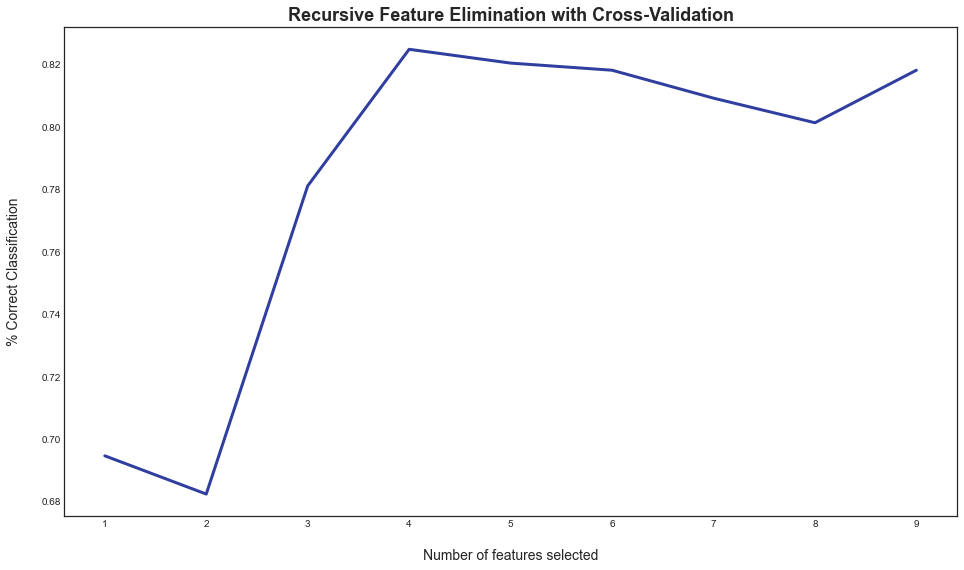

In [43]:
# Optimal Features Curve

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold')
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)

plt.show()

In [44]:
rfecv.cv_results_['mean_test_score']

array([0.6947191 , 0.68245943, 0.7811985 , 0.82496879, 0.82054931,
       0.81826467, 0.80931336, 0.80143571, 0.81827715])

In [45]:
## identifying which features are important
import numpy as np
np.where(rfecv.support_ == False)[0]

array([3, 4, 6, 7, 8], dtype=int64)

In [46]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]],axis=1,inplace=True)

In [47]:
X

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,29.0,23.4500
889,1,0,26.0,30.0000


In [48]:
titanic.columns[1:][rfecv.support_]

Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [49]:
## Feature Importance

rfecv.estimator_.feature_importances_

array([0.10189403, 0.29004814, 0.28123856, 0.32681928])

<BarContainer object of 4 artists>

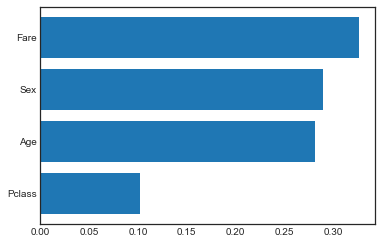

In [50]:
# plotting and Visualing Feature importance

dframe = pd.DataFrame()
dframe['attr'] = X.columns
dframe['importance'] = rfecv.estimator_.feature_importances_

dframe.sort_values(by='importance',ascending=True,inplace=True)

plt.barh(y = dframe['attr'],width = dframe['importance'])

## Feature Tools

In [139]:
# Deep Feature Synthesis
# Creates many features from the existing features
# It stacks multiple transformation and aggregation operations which are feature primitives

# https://featuretools.alteryx.com/en/stable/install.html
# https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html

In [52]:
# The main issue with feature engineering is being able to take different sets of data which are often distributed across multiple tables and combine them into a single table that can be used for training a machine learning model.
# Feature Tools creates many new candidate features with minimal effort and then combining them into a single table that can be passed to our model

In [74]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [118]:
clients_df = pd.read_csv('clients.txt',parse_dates=['joined'])
clients_df.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [119]:
loans_df = pd.read_csv('loans.txt',parse_dates=['loan_start','loan_end'])
loans_df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [120]:
payments_df = pd.read_csv('payments.txt',parse_dates=['payment_date'])
payments_df.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [78]:
# Entity vs EntitySet
# Relationships between tables
# Feature primitives: aggregations and transformations
# Deep Feature Synthesis

In [79]:
## Entity vs EntitySet

# Entity --> Table we loaded
# EntitySet --> Combinations of Entities

In [80]:
## Installing

#!pip install featuretools

In [122]:
## Creating Entity Sets

import featuretools as ft
from woodwork.logical_types import Categorical, PostalCode

In [82]:
# https://featuretools.alteryx.com/en/stable/install.html
# install from source

In [104]:
# https://stackoverflow.com/questions/69665765/featuretoolsentityset-object-has-no-attribute-entity-from-dataframe

In [123]:
es = ft.EntitySet(id="client_loan_payment_data")

In [125]:
es = es.add_dataframe(
    dataframe_name="clients",
    dataframe=clients_df,
    index="client_id",
    time_index="joined"
)

es

Entityset: client_loan_payment_data
  DataFrames:
    clients [Rows: 25, Columns: 4]
  Relationships:
    No relationships

In [128]:
es = es.add_dataframe(
    dataframe_name="loans",
    dataframe=loans_df,
    index="loan_id",
    time_index="loan_start",
    logical_types = {"repaid":Categorical}
)

es

Entityset: client_loan_payment_data
  DataFrames:
    clients [Rows: 25, Columns: 4]
    loans [Rows: 443, Columns: 8]
  Relationships:
    No relationships

In [129]:
payments_df.head(1)

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1


In [131]:
es = es.add_dataframe(
    dataframe_name="payments",
    dataframe=payments_df,
    index="payment_id",
    make_index = True,
    time_index="payment_date",
    logical_types={
        "missed": Categorical
    }
)

es

Entityset: client_loan_payment_data
  DataFrames:
    clients [Rows: 25, Columns: 4]
    loans [Rows: 443, Columns: 8]
    payments [Rows: 3456, Columns: 5]
  Relationships:
    No relationships

In [135]:
es['loans'].ww.schema 

,Logical Type,Semantic Tag(s)
Column,,
client_id,Integer,['numeric']
loan_type,Categorical,['category']
loan_amount,Integer,['numeric']
repaid,Categorical,['category']
loan_id,Integer,['index']
loan_start,Datetime,['time_index']
loan_end,Datetime,[]
rate,Double,['numeric']


In [136]:
es['payments'].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
payment_id,Integer,['index']
loan_id,Integer,['numeric']
payment_amount,Integer,['numeric']
payment_date,Datetime,['time_index']
missed,Categorical,['category']


In [137]:
es['clients'].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
client_id,Integer,['index']
joined,Datetime,['time_index']
income,Integer,['numeric']
credit_score,Integer,['numeric']


In [138]:
## Relationships between tables

# one to many relationships
# 1 parent - many child 

In [140]:
# Adding a Relationship

es = es.add_relationship("clients", "client_id", "loans", "client_id")
es

Entityset: client_loan_payment_data
  DataFrames:
    clients [Rows: 25, Columns: 4]
    loans [Rows: 443, Columns: 8]
    payments [Rows: 3456, Columns: 5]
  Relationships:
    loans.client_id -> clients.client_id

In [141]:
es = es.add_relationship("loans", "loan_id","payments","loan_id")
es

Entityset: client_loan_payment_data
  DataFrames:
    clients [Rows: 25, Columns: 4]
    loans [Rows: 443, Columns: 8]
    payments [Rows: 3456, Columns: 5]
  Relationships:
    loans.client_id -> clients.client_id
    payments.loan_id -> loans.loan_id

In [ ]:
## Feature primitives: aggregations and transformations

In [145]:
primitives = ft.list_primitives()

In [149]:
pd.options.display.max_colwidth = 80
primitives[primitives['type'] == 'aggregation']

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
0,num_unique,aggregation,True,True,"Determines the number of distinct values, ignoring `NaN` values.",<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
1,num_true,aggregation,True,False,Counts the number of `True` values.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type...",<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
2,last,aggregation,False,False,Determines the last value in a list.,<ColumnSchema>,None
3,mean,aggregation,True,True,Computes the average for a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
4,n_most_common,aggregation,False,False,Determines the `n` most common elements.,<ColumnSchema (Semantic Tags = ['category'])>,None
5,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` values.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
6,sum,aggregation,True,True,"Calculates the total addition, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
7,mode,aggregation,False,False,Determines the most commonly repeated value.,<ColumnSchema (Semantic Tags = ['category'])>,None
8,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
9,max,aggregation,True,True,"Calculates the highest value, ignoring `NaN` values.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>


In [150]:
primitives[primitives['type'] != 'aggregation']

,name,type,dask_compatible,spark_compatible,description,valid_inputs,return_type
22,email_address_to_domain,transform,False,False,Determines the domain of an email,<ColumnSchema (Logical Type = EmailAddress)>,<ColumnSchema (Logical Type = Categorical) (Semantic Tags = ['category'])>
23,number_of_unique_words,transform,False,False,Determines the number of unique words in a string.,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
24,count_string,transform,False,False,Determines how many times a given string shows up in a text field.,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
25,month,transform,True,True,Determines the month value of a datetime.,<ColumnSchema (Logical Type = Datetime)>,"<ColumnSchema (Logical Type = Ordinal: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1..."
26,modulo_by_feature,transform,True,True,Computes the modulo of a scalar by each element in a list.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
...,...,...,...,...,...,...,...
131,less_than_equal_to_scalar,transform,True,True,Determines if values are less than or equal to a given scalar.,"<ColumnSchema (Semantic Tags = ['numeric'])>, <ColumnSchema (Logical Type = ...",<ColumnSchema (Logical Type = BooleanNullable)>
132,sine,transform,True,True,Computes the sine of a number.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
133,geomidpoint,transform,False,False,Determines the geographic center of two coordinates.,<ColumnSchema (Logical Type = LatLong)>,<ColumnSchema (Logical Type = LatLong)>
134,greater_than_equal_to,transform,True,True,Determines if values in one list are greater than or equal to another list.,"<ColumnSchema (Semantic Tags = ['numeric'])>, <ColumnSchema (Logical Type = ...",<ColumnSchema (Logical Type = BooleanNullable)>


In [151]:
# Create new features using specified primitives

features, feature_names = ft.dfs(entityset=es, target_dataframe_name='clients',
                                    agg_primitives=["mean","sum","max","percent_true","count","last"],
                                    trans_primitives=["day","year","month","weekday"])

In [153]:
features.head()

,income,credit_score,COUNT(loans),LAST(loans.loan_amount),LAST(loans.loan_id),LAST(loans.loan_type),LAST(loans.rate),LAST(loans.repaid),MAX(loans.loan_amount),MAX(loans.rate),...,DAY(LAST(payments.payment_date)),MONTH(LAST(loans.loan_end)),MONTH(LAST(loans.loan_start)),MONTH(LAST(payments.payment_date)),WEEKDAY(LAST(loans.loan_end)),WEEKDAY(LAST(loans.loan_start)),WEEKDAY(LAST(payments.payment_date)),YEAR(LAST(loans.loan_end)),YEAR(LAST(loans.loan_start)),YEAR(LAST(payments.payment_date))
client_id,,,,,,,,,,,,,,,,,,,,,
42320,229481,563,15,8090,10156,home,3.18,0,13887.0,6.74,...,12,4,9,4,4,5,4,2015,2012,2013
39384,191204,617,19,14654,11735,other,2.26,0,14654.0,9.23,...,13,3,7,3,6,0,4,2016,2014,2015
26945,214516,806,15,9249,11482,cash,2.86,1,14593.0,5.65,...,30,5,12,7,2,1,2,2016,2013,2014
41472,152214,638,16,10122,11936,cash,1.03,0,13657.0,9.82,...,21,6,8,3,2,2,5,2016,2014,2015
46180,43851,562,20,3834,10887,other,1.38,0,14081.0,9.26,...,2,2,5,2,2,5,0,2016,2014,2015


In [154]:
feature_names

[<Feature: income>,
 <Feature: credit_score>,
 <Feature: COUNT(loans)>,
 <Feature: LAST(loans.loan_amount)>,
 <Feature: LAST(loans.loan_id)>,
 <Feature: LAST(loans.loan_type)>,
 <Feature: LAST(loans.rate)>,
 <Feature: LAST(loans.repaid)>,
 <Feature: MAX(loans.loan_amount)>,
 <Feature: MAX(loans.rate)>,
 <Feature: MEAN(loans.loan_amount)>,
 <Feature: MEAN(loans.rate)>,
 <Feature: SUM(loans.loan_amount)>,
 <Feature: SUM(loans.rate)>,
 <Feature: COUNT(payments)>,
 <Feature: LAST(payments.missed)>,
 <Feature: LAST(payments.payment_amount)>,
 <Feature: LAST(payments.payment_id)>,
 <Feature: MAX(payments.payment_amount)>,
 <Feature: MEAN(payments.payment_amount)>,
 <Feature: SUM(payments.payment_amount)>,
 <Feature: DAY(joined)>,
 <Feature: MONTH(joined)>,
 <Feature: WEEKDAY(joined)>,
 <Feature: YEAR(joined)>,
 <Feature: LAST(loans.COUNT(payments))>,
 <Feature: LAST(loans.DAY(loan_end))>,
 <Feature: LAST(loans.DAY(loan_start))>,
 <Feature: LAST(loans.MAX(payments.payment_amount))>,
 <Feature

In [155]:
## Deep Feature Synthesis

# Deep Feature Synthesis (DFS) is an automated method for performing feature engineering on relational and temporal data.
# combining 2 or more features is called deep feature synthesis if only 1 is used, then it is called feature synthesis 

In [157]:
## Automated Deep Feature Synthesis

# Feature Tools can automatically generate many new features for us without us specifying the primitives
# we have to specify 'max_depth' parameter 

In [159]:
features, feature_names = ft.dfs(entityset=es, target_dataframe_name='clients',max_depth=4)

In [160]:
features

,income,credit_score,COUNT(loans),MAX(loans.loan_amount),MAX(loans.rate),MEAN(loans.loan_amount),MEAN(loans.rate),MIN(loans.loan_amount),MIN(loans.rate),MODE(loans.loan_type),...,SKEW(loans.NUM_UNIQUE(payments.WEEKDAY(payment_date))),SKEW(loans.NUM_UNIQUE(payments.YEAR(payment_date))),STD(loans.NUM_UNIQUE(payments.DAY(payment_date))),STD(loans.NUM_UNIQUE(payments.MONTH(payment_date))),STD(loans.NUM_UNIQUE(payments.WEEKDAY(payment_date))),STD(loans.NUM_UNIQUE(payments.YEAR(payment_date))),SUM(loans.NUM_UNIQUE(payments.DAY(payment_date))),SUM(loans.NUM_UNIQUE(payments.MONTH(payment_date))),SUM(loans.NUM_UNIQUE(payments.WEEKDAY(payment_date))),SUM(loans.NUM_UNIQUE(payments.YEAR(payment_date)))
client_id,,,,,,,,,,,,,,,,,,,,,
42320,229481,563,15,13887.0,6.74,7062.066667,2.457333,1070.0,0.38,home,...,-0.378644,0.547317,2.225395,1.846490,1.355764,0.632456,100.0,98.0,68.0,24.0
39384,191204,617,19,14654.0,9.23,7865.473684,3.538421,1770.0,0.43,credit,...,0.002498,1.603463,2.043389,1.559727,1.182227,0.945905,129.0,116.0,91.0,32.0
26945,214516,806,15,14593.0,5.65,7125.933333,2.855333,653.0,0.13,credit,...,0.726471,0.547317,1.549193,1.889822,1.245946,0.632456,99.0,90.0,67.0,24.0
41472,152214,638,16,13657.0,9.82,7510.812500,3.981250,986.0,0.01,cash,...,0.705987,-0.895257,1.360147,1.258306,1.093542,0.478714,94.0,90.0,71.0,27.0
46180,43851,562,20,14081.0,9.26,7700.850000,3.502500,1607.0,0.57,other,...,-0.683319,0.784528,2.183069,1.281447,1.095445,0.606977,133.0,116.0,92.0,30.0
46109,172677,527,20,14049.0,9.48,8951.600000,3.152500,559.0,0.50,credit,...,0.227619,-0.217687,1.496487,1.490320,1.019546,0.510418,123.0,114.0,95.0,31.0
32885,58955,642,15,14162.0,9.11,9920.400000,2.436000,3704.0,0.10,cash,...,0.100583,0.433026,1.684665,2.065591,0.899735,0.703732,103.0,92.0,70.0,26.0
29841,38354,523,18,14837.0,6.76,9813.000000,3.445000,2778.0,0.26,home,...,-0.411033,-0.773082,1.855041,1.830211,1.109967,0.485071,129.0,125.0,91.0,30.0
38537,127183,643,17,14804.0,8.01,8986.352941,2.389412,2396.0,0.35,credit,...,-0.070970,-1.372252,1.178858,1.212678,1.358524,0.437237,111.0,107.0,80.0,30.0


In [ ]:
# we can use feature selector from feature tools dfs

## AutoFeat

In [126]:
# AutoFeatRegressor
# AutoFeatClassifier

In [8]:
# !pip install autofeat
# !pip install numpy
# !pip install numba

In [23]:
from autofeat import FeatureSelector
import autofeat
from sklearn.datasets import load_wine

data = load_wine()

In [24]:
selector = FeatureSelector(verbose=1)

In [32]:
X = data.data
y = data.target

In [33]:
import pandas as pd

In [34]:
X = pd.DataFrame(X,columns=data.feature_names)
y = pd.Series(y)

In [35]:
newXFeature = selector.fit_transform(X,y)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 9 features after 5 feature selection runs
[featsel] 9 features after correlation filtering
[featsel] 7 features after noise filtering


In [40]:
newXFeature

,hue,alcohol,proline,flavanoids,color_intensity,alcalinity_of_ash,od280/od315_of_diluted_wines
0,1.04,14.23,1065.0,3.06,5.64,15.6,3.92
1,1.05,13.20,1050.0,2.76,4.38,11.2,3.40
2,1.03,13.16,1185.0,3.24,5.68,18.6,3.17
3,0.86,14.37,1480.0,3.49,7.80,16.8,3.45
4,1.04,13.24,735.0,2.69,4.32,21.0,2.93
...,...,...,...,...,...,...,...
173,0.64,13.71,740.0,0.61,7.70,20.5,1.74
174,0.70,13.40,750.0,0.75,7.30,23.0,1.56
175,0.59,13.27,835.0,0.69,10.20,20.0,1.56
176,0.60,13.17,840.0,0.68,9.30,20.0,1.62


In [41]:
# AutoFeatModel, AutoFeatRegressor, AutoFeatClassifier

## How to Deal with Data Imbalance

In [2]:
# Class imbalance is the situation where the classes in our dataset are not represented equally.
# Problems with data imbalance, the algorithm will end classifying the points as the class with higher distribution as the algorithm will memorize.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
# 492 as fraud

In [5]:
notfraud = len(df[df['Class']==0])
fraud = len(df[df['Class']==1])

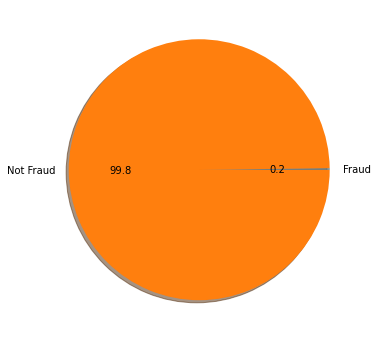

In [6]:
labels = 'Fraud','Not Fraud'

sizes = [fraud,notfraud]

plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,autopct='%1.1f',shadow=True)
plt.show()

In [7]:
print(fraud,notfraud)

492 284315


In [8]:
pd.isnull(df).sum() >0 

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
## Dummy Classifier

# seperate Features and target
y = df['Class']
X = df.drop('Class',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score

In [11]:
# split the data into train and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=50)

# Dummy Classifier
dummyc = DummyClassifier(strategy='most_frequent')

# train the model
dummyc.fit(xtrain,ytrain)

DummyClassifier(strategy='most_frequent')

In [12]:
# make some predictions

dummyPred = dummyc.predict(xtest)

In [13]:
np.unique(dummyPred)

array([0], dtype=int64)

In [14]:
accuracy_score(ytest,dummyPred)

0.9984129659279234

In [15]:
## logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lrPred = lr.predict(xtest)

accuracy_score(ytest,lrPred)

0.9989887924496503

In [16]:
np.unique(lrPred)

array([0, 1], dtype=int64)

In [17]:
lr.score(xtrain,ytrain)

0.9990917815594205

In [18]:
lr.score(xtest,ytest)

0.9989887924496503

## Dealing with Data Imbalance

In [65]:
# Adding more data
# Change our performance metrics --> confusion matrix, Recall, Precision, F1 score
# Change the Algorithm
# Resampling
    # upsampling / Oversampling
    # Downsampling / Undersampling

In [19]:
pd.DataFrame(confusion_matrix(ytest,dummyPred))

,0,1
0,71089,0
1,113,0


In [20]:
pd.DataFrame(confusion_matrix(ytest,lrPred))

,0,1
0,71050,39
1,33,80


In [21]:
from sklearn.metrics import plot_confusion_matrix

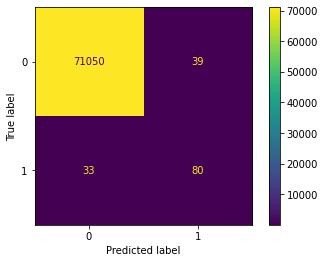

In [22]:
plot_confusion_matrix(lr,xtest,ytest)

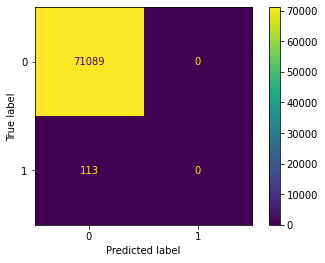

In [23]:
plot_confusion_matrix(dummyc,xtest,ytest)

In [24]:
recall_score(ytest,dummyPred)

0.0

In [25]:
recall_score(ytest,lrPred)

0.7079646017699115

In [26]:
f1_score(ytest,dummyPred)

0.0

In [27]:
f1_score(ytest,lrPred)

0.6896551724137931

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [30]:
rfPred = rf.predict(xtest)

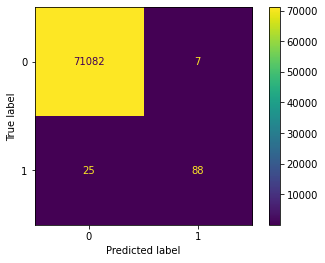

In [32]:
plot_confusion_matrix(rf,xtest,ytest)

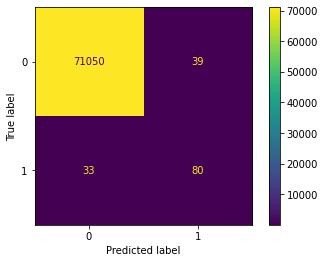

In [33]:
plot_confusion_matrix(lr,xtest,ytest)

In [34]:
recall_score(ytest,rfPred)

0.7787610619469026

In [35]:
f1_score(ytest,rfPred)

0.8461538461538461

In [36]:
recall_score(ytest,lrPred)

0.7079646017699115

In [37]:
f1_score(ytest,lrPred)

0.6896551724137931

## Upsampling or Oversampling

In [66]:
# we increase the number of samples in the minority class to match up with the number of samples in the majority class

In [38]:
# implementation with resample

from sklearn.utils import resample

In [42]:
Fraud = df[df['Class'] == 1]
NotFraud = df[df['Class'] == 0]

In [48]:
NeedToBeSampled = len(NotFraud) - len(Fraud)
NeedToBeSampled

283823

In [50]:
FraudDataUpsampled = resample(Fraud,replace=True,n_samples=NeedToBeSampled,random_state=1)

In [56]:
TestFraudDataUpsampled = resample(Fraud,replace=True,n_samples=len(NotFraud),random_state=1)

In [53]:
Upsampled = pd.concat([df,FraudDataUpsampled])

In [55]:
Upsampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [57]:
TestUpsampled = pd.concat([df,TestFraudDataUpsampled])
TestUpsampled['Class'].value_counts()

1    284807
0    284315
Name: Class, dtype: int64

In [59]:
# We can also implement Oversampling using RandomOverSampler

## RandomOverSampler

In [61]:
# !pip install imbalanced-learn

In [63]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

randover = RandomOverSampler(random_state=50)

In [66]:
Xres, yres = randover.fit_resample(X,y)

In [67]:
Counter(y)

Counter({0: 284315, 1: 492})

In [68]:
Counter(yres)

Counter({0: 284315, 1: 284315})

## Logistic Regression on Oversampled Balanced Data

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()

In [72]:
ytrain = Upsampled.Class
xtrain = Upsampled.drop('Class',axis = 1)

In [73]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [74]:
UpsampledPred = lr.predict(xtest)

In [75]:
accuracy_score(ytest,UpsampledPred)

0.9660121906688014

In [76]:
recall_score(ytest,UpsampledPred)

0.9380530973451328

In [77]:
f1_score(ytest,UpsampledPred)

0.08054711246200608

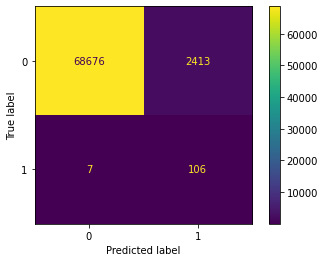

In [80]:
plot_confusion_matrix(lr,xtest,ytest)

## Downsampling / Undersampling

In [81]:
# we decrease the number of samples in the majority class to match up with the number of samples in the minority class

In [82]:
Downsampled = resample(NotFraud,replace=True,n_samples=len(Fraud),random_state=1)

In [84]:
Downsampled = pd.concat([Fraud,Downsampled])

In [85]:
Downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [86]:
ytrain = Downsampled.Class
xtrain = Downsampled.drop('Class',axis = 1)

In [87]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [88]:
DownsampledPred = lr.predict(xtest)

In [89]:
accuracy_score(ytest,DownsampledPred)

0.9652537850060392

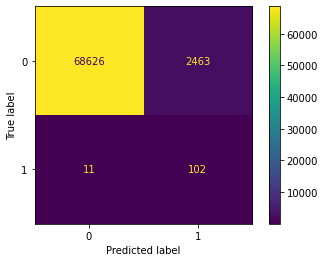

In [90]:
plot_confusion_matrix(lr,xtest,ytest)

In [91]:
recall_score(ytest,DownsampledPred)

0.9026548672566371

In [92]:
f1_score(ytest,DownsampledPred)

0.0761762509335325

## Generate Synthesis Sampling (SMOTE)

In [95]:
# SMOTE - Synthesis Minority Oversampling Technique
# creates synthetic observations of the minority class
# SMOTE uses a nearest neighbors algorithm to generate new and synthetic data

In [97]:
# !pip install smote

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
y = df['Class']
X = df.drop('Class',axis = 1)

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=27)

In [101]:
sm = SMOTE(random_state=27)

In [102]:
xtrain1, ytrain1 = sm.fit_resample(xtrain,ytrain) # upsample

In [103]:
xtrain1.shape

(426490, 30)

In [104]:
smote = LogisticRegression(solver='liblinear').fit(xtrain1,ytrain1)

In [105]:
smotePred = smote.predict(xtest)

In [106]:
accuracy_score(ytest,smotePred)

0.9858571388444145

In [107]:
confusion_matrix(ytest,smotePred)

array([[70081,   989],
       [   18,   114]], dtype=int64)

## Random Forest on the upsampled data

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier(n_estimators=10).fit(xtrain1,ytrain1)

In [110]:
rfPred = rf.predict(xtest)

In [111]:
accuracy_score(ytest,rfPred)

0.9994663071262043

In [112]:
confusion_matrix(ytest,rfPred)

array([[71056,    14],
       [   24,   108]], dtype=int64)

## How to Deal with Data leakage

In [ ]:
# Introduction to Data leakage

# It happens when you train your algorithm on a dataset that includes information that would not be available at the time of prediction when you apply that model you collect in the future
# when the data that we are using to train an ML algorithm has the information the model is trying to predict
# some features might not be available during testing 


In [161]:
# How do i end up in data leakage

# Duplicates
# Leaky predictors - data that will not be available at the time we make predictions.
# Pre processing activities

In [172]:
df = {'Purchase':['Yes','Yes','No','Yes','No','Yes','Yes'],
      'QTY':[2,5,17,4,0,3,7],
      'Product':['Milk','Sugar','Biscuit','Chocolate','Coffee','Bread','Egg'],
      'Discount':['Yes','No','No','Yes','No','Yes','Yes']}

In [173]:
df = pd.DataFrame(df)
df

,Purchase,QTY,Product,Discount
0,Yes,2,Milk,Yes
1,Yes,5,Sugar,No
2,No,17,Biscuit,No
3,Yes,4,Chocolate,Yes
4,No,0,Coffee,No
5,Yes,3,Bread,Yes
6,Yes,7,Egg,Yes


In [174]:
# Leaky predictors

# if features not available during testing / prediction, the model will fail

In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
le = LabelEncoder()

purch = le.fit_transform(df['Purchase'])
dst = le.fit_transform(df['Discount'])
pdt = le.fit_transform(df['Product'])

df['Purchase'] = purch
df['Discount'] = dst
df['Product'] = pdt

In [177]:
df

,Purchase,QTY,Product,Discount
0,1,2,5,1
1,1,5,6,0
2,0,17,0,0
3,1,4,2,1
4,0,0,3,0
5,1,3,1,1
6,1,7,4,1


In [178]:
df.corr()

,Purchase,QTY,Product,Discount
Purchase,1.000000,-0.377135,4.743416e-01,7.302967e-01
QTY,-0.377135,1.000000,-4.853627e-01,-3.202563e-01
Product,0.474342,-0.485363,1.000000e+00,-1.602469e-17
Discount,0.730297,-0.320256,-1.602469e-17,1.000000e+00


In [182]:
## Data Preprocessing Approaches

# Approach 1 --> Applying Standardization before splitting - Wrong
# Approach 2 --> Applying Standardization after splitting - Correct

In [183]:
# Split the dataset into training and testing sets
# Perform Data Preparation on training set
# Fit the model on the training set
# Evaluate models on the test/validation sets

In [201]:
from sklearn.datasets import make_classification

# define dataset
X,y = make_classification(n_samples=1000,n_features=10)

In [202]:
print(X.shape,y.shape)

(1000, 10) (1000,)


In [188]:
# Approach 1 - Incorrect Method

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2,random_state=50)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(Xtrain,Ytrain)

LogisticRegression()

In [206]:
from sklearn.metrics import accuracy_score

In [207]:
accuracy_score(Ytest,model.predict(Xtest))

0.955

In [208]:
accuracy_score(Ytrain,model.predict(Xtrain))

0.9175

In [193]:
# Approach 1 - Correct Method

In [194]:
# define dataset
X,y = make_classification(n_samples=1000,n_features=10)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2,random_state=50)


Xtrain = scaler.fit_transform(Xtrain)

In [195]:
Xtest = scaler.transform(Xtest)

In [196]:
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [198]:
model.score(Xtrain,Ytrain)

0.8975

In [199]:
model.score(Xtest,Ytest)

0.88

In [209]:
## Data Preprocessing Cross Validation

In [ ]:
# Approach 1 - Incorrect way

In [211]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=8,n_redundant=2,random_state=20)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [212]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=50)

# evaluate the model using cross validation
scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=1)

In [217]:
scores

array([0.88, 0.87, 0.87, 0.89, 0.85, 0.9 , 0.91, 0.92, 0.9 , 0.9 , 0.88,
       0.88, 0.87, 0.89, 0.91, 0.9 , 0.91, 0.88, 0.82, 0.92, 0.9 , 0.85,
       0.94, 0.89, 0.87, 0.86, 0.87, 0.88, 0.89, 0.92, 0.93, 0.87, 0.87,
       0.94, 0.91, 0.91, 0.9 , 0.8 , 0.87, 0.88, 0.9 , 0.93, 0.87, 0.84,
       0.9 , 0.92, 0.93, 0.85, 0.84, 0.9 ])

In [215]:
np.mean(scores) * 100

88.76

In [218]:
# Approach 2 - Correct way

# We use a pipeline

In [216]:
X,y = make_classification(n_samples=1000,n_features=10,n_informative=8,n_redundant=2,random_state=20)

scaler = MinMaxScaler()

In [219]:
from sklearn.pipeline import Pipeline

In [220]:
steps = list()

steps.append(('scaler',MinMaxScaler()))
steps.append(('model',LogisticRegression()))
pipeline= Pipeline(steps=steps)

In [221]:
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=50)

# evaluate the model using cross validation
scores = cross_val_score(pipeline,X,y,scoring='accuracy',cv=cv,n_jobs=1)

In [222]:
np.mean(scores) * 100

88.64